# Hierarchical Clustering Tutorial for Beginners

Welcome to your hierarchical clustering journey! This notebook will teach you one of the most intuitive and powerful clustering techniques in machine learning.

## What is Hierarchical Clustering?

Hierarchical clustering is like building a **family tree for your data**! Unlike K-Means (where you must decide the number of clusters upfront), hierarchical clustering reveals natural relationships between data points by creating a tree-like structure called a **dendrogram**.

### Think of it like organizing a photo album:
- **Bottom level**: Individual photos (data points)
- **Middle levels**: Group similar photos (friends, family, events)
- **Top level**: All photos in one big album

### Two Types of Hierarchical Clustering:

1. **Agglomerative (Bottom-Up)** - What we'll use today!
   - Start: Each data point is its own cluster
   - Process: Merge closest clusters step by step
   - End: One big cluster containing everything

2. **Divisive (Top-Down)** - Less common
   - Start: All data in one big cluster
   - Process: Split clusters into smaller ones
   - End: Each data point is its own cluster

## Why Choose Hierarchical Clustering?

### **Advantages:**
- **No need to specify cluster count** - The dendrogram shows you the optimal number!
- **Deterministic results** - Same data always gives same tree structure
- **Works with any cluster shape** - Not limited to spherical clusters like K-Means
- **Shows cluster relationships** - Understand how clusters relate to each other
- **Great for exploratory analysis** - Discover hidden patterns in your data

### **Disadvantages:**
- **Computationally expensive** - Slow for large datasets (O(n³) complexity)
- **Memory intensive** - Needs to store distance matrix
- **Sensitive to outliers** - One bad data point can affect entire tree
- **No reassignment** - Once merged, clusters can't be split

## Real-World Applications

**Business & Marketing:**
- Customer segmentation for targeted campaigns
- Product categorization in e-commerce
- Market research and consumer behavior analysis

**Science & Research:**
- Species classification in biology
- Gene expression analysis in genetics
- Document clustering in text mining

**Technology:**
- Social network analysis (finding communities)
- Image segmentation in computer vision
- Anomaly detection in cybersecurity

## What You'll Learn Today

By the end of this tutorial, you'll master:

1. **Data Preparation** - Loading and understanding customer data
2. **Dendrogram Creation** - Building the hierarchical tree
3. **Optimal Cluster Selection** - Reading the dendrogram like a pro
4. **Model Implementation** - Applying agglomerative clustering
5. **Results Visualization** - Creating beautiful cluster plots
6. **Business Interpretation** - Turning clusters into actionable insights

## Our Project: Mall Customer Segmentation

We'll analyze **Mall Customer Data** to segment shoppers based on:
- **Annual Income** (in thousands of dollars)
- **Spending Score** (1-100 rating based on shopping behavior)

**Business Goal:** Help the mall understand different customer types to:
- Optimize store layouts
- Target marketing campaigns  
- Improve customer experience
- Increase revenue through personalized offers

Let's dive in and discover the hidden customer segments!

---

## Step 1: Import Libraries

Let's start by importing the essential Python libraries we'll need for hierarchical clustering. Each library serves a specific purpose in our analysis:

### Essential Libraries for Hierarchical Clustering:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Understanding Each Library:

**NumPy (np)**: The Mathematical Foundation
- Handles numerical arrays and mathematical operations
- Provides efficient storage and computation for large datasets
- Essential for distance calculations in clustering

**Pandas (pd)**: The Data Manipulation Expert  
- Reads CSV files and creates DataFrames (like Excel spreadsheets)
- Helps us explore, clean, and prepare our data
- Makes data analysis intuitive and powerful

**Matplotlib.pyplot (plt)**: The Visualization Artist
- Creates beautiful charts, graphs, and plots
- We'll use it to visualize our dendrogram and cluster results
- Essential for understanding and presenting our findings

### Additional Libraries We'll Import Later:

**scipy.cluster.hierarchy**: The Hierarchical Clustering Specialist
- Creates dendrograms (tree diagrams showing cluster relationships)
- Provides linkage methods for building cluster hierarchies
- Core library for hierarchical clustering algorithms

**sklearn.cluster.AgglomerativeClustering**: The ML Implementation
- Scikit-learn's implementation of agglomerative clustering
- Provides efficient algorithms with various linkage criteria
- Industry-standard tool for production clustering

**Pro Tip**: These libraries work together like a well-orchestrated team - NumPy handles the math, Pandas manages the data, Matplotlib creates the visuals, and the clustering libraries do the heavy lifting!

## Step 2: Load the Dataset

Time to load our customer data! We're working with the **Mall Customers Dataset** - a popular dataset for learning clustering techniques.

### About Our Dataset:

Our dataset contains information about mall customers with various attributes, but we'll focus on two key features that are perfect for clustering:

- **Annual Income (k$)**: Customer's yearly income in thousands of dollars
- **Spending Score (1-100)**: Mall's assessment of customer spending behavior and patterns

### Why These Two Features?

**Perfect for Hierarchical Clustering because:**
1. **Numerical Variables**: Both are continuous numbers (not categories)
2. **Business Relevance**: Income and spending directly relate to customer behavior
3. **Clear Relationships**: We expect interesting patterns between earning and spending
4. **Interpretable Results**: Easy to understand and explain to business stakeholders

### Expected Customer Types:

Before we even start clustering, let's hypothesize what customer segments we might find:
- **High Earners, High Spenders**: Premium customers who can and do spend a lot
- **High Earners, Low Spenders**: Wealthy but cautious customers  
- **Low Earners, High Spenders**: Budget customers who love to shop
- **Low Earners, Low Spenders**: Budget-conscious, practical shoppers
- **Middle Ground**: Average customers with moderate income and spending

Let's load the data and see what we discover!

In [ ]:
# Load the Mall Customers dataset
dataset = pd.read_csv('../Data/Mall_Customers.csv')

# Extract the features we'll use for clustering
# Column 3 = Annual Income (k$), Column 4 = Spending Score (1-100)
X = dataset.iloc[:, [3, 4]].values

print("Dataset loaded successfully!")
print(f"Dataset shape: {dataset.shape}")
print(f"Features for clustering: {dataset.columns[[3, 4]].tolist()}")
print(f"Number of customers: {len(X)}")
print()
print("First few rows of our dataset:")
print(dataset.head())

✅ Dataset loaded successfully!
📊 Dataset shape: (200, 5)
🎯 Features for clustering: ['Annual Income (k$)', 'Spending Score (1-100)']
👥 Number of customers: 200

📋 First few rows of our dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


### Understanding the Code:

```python
dataset = pd.read_csv('../Data/Mall_Customers.csv')
```
- Reads the CSV file from the Data folder (one level up: `../`)
- Creates a pandas DataFrame - think of it as an Excel spreadsheet in Python

```python
X = dataset.iloc[:, [3, 4]].values
```
- `iloc[:, [3, 4]]`: Selects ALL rows (`:`) and columns 3 and 4 (`[3, 4]`)
- Column 3 = Annual Income, Column 4 = Spending Score  
- `.values`: Converts to NumPy array (required format for clustering algorithms)

**Why X?** In machine learning convention:
- `X` represents features/inputs (what we use to make predictions or clusters)
- `y` represents targets/outputs (what we want to predict - not needed for clustering!)

---

## Step 3: Exploratory Data Analysis (EDA)

Before jumping into clustering, let's understand our data better. This crucial step helps us:
- Spot potential issues or outliers
- Understand the distribution of our features  
- Get intuition about possible cluster patterns
- Validate our feature selection

=== DATASET OVERVIEW ===
Shape: (200, 5)
Features: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

=== STATISTICAL SUMMARY ===
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

=== FEATURE ANALYSIS ===
Annual Income range: $15k - $137k
Spending Score range: 1 - 99

=== MISSING VALUES CHECK ===
Missing values: 0



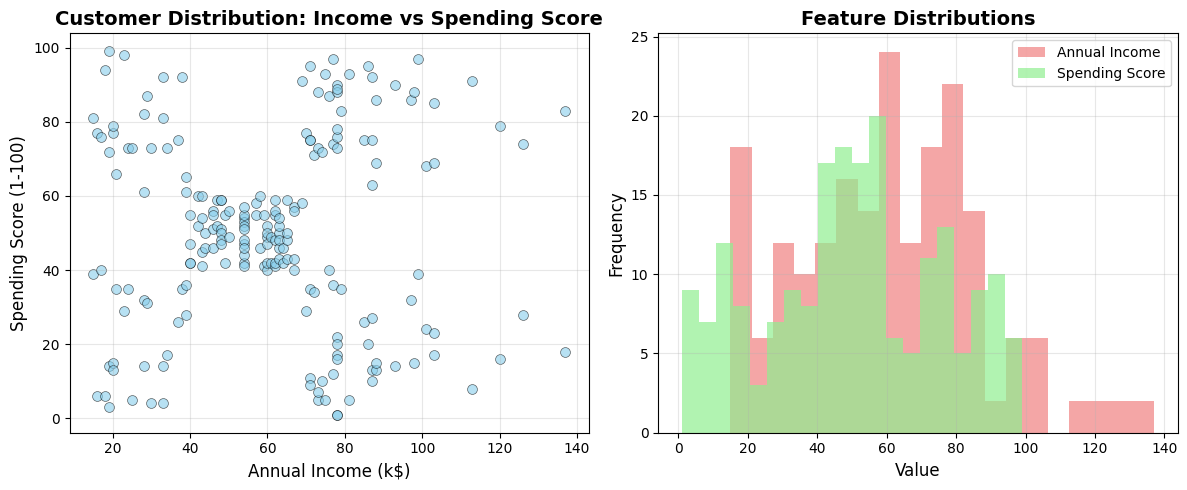

In [3]:
# Comprehensive data exploration
print("=== DATASET OVERVIEW ===")
print(f"Shape: {dataset.shape}")
print(f"Features: {list(dataset.columns)}")
print()

print("=== STATISTICAL SUMMARY ===")
print(dataset.describe())
print()

print("=== FEATURE ANALYSIS ===")
print(f"Annual Income range: ${dataset.iloc[:, 3].min()}k - ${dataset.iloc[:, 3].max()}k")
print(f"Spending Score range: {dataset.iloc[:, 4].min()} - {dataset.iloc[:, 4].max()}")
print()

print("=== MISSING VALUES CHECK ===")
print(f"Missing values: {dataset.isnull().sum().sum()}")
print()

# Visualize the raw data distribution
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot of Income vs Spending Score
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.6, s=50, color='skyblue', edgecolors='black', linewidth=0.5)
plt.title('Customer Distribution: Income vs Spending Score', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True, alpha=0.3)

# Subplot 2: Histograms
plt.subplot(1, 2, 2)
plt.hist(X[:, 0], bins=20, alpha=0.7, label='Annual Income', color='lightcoral')
plt.hist(X[:, 1], bins=20, alpha=0.7, label='Spending Score', color='lightgreen')
plt.title('Feature Distributions', fontsize=14, fontweight='bold')
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### What to Look for in the EDA Results:

**From the scatter plot, observe:**
- **Data distribution**: Are customers spread evenly or clustered?
- **Natural groupings**: Can you visually spot potential clusters?
- **Outliers**: Any customers with unusual income/spending combinations?
- **Relationships**: Do high-income customers always spend more?

**From the histograms, notice:**
- **Income distribution**: Is it normal, skewed, or bimodal?
- **Spending score distribution**: How varied are customer spending patterns?
- **Feature scales**: Both features should be reasonably comparable for clustering

**Key Insights for Hierarchical Clustering:**
- Look for natural separations in the data
- Identify potential cluster boundaries
- Note any obvious groupings that hierarchical clustering should discover

**Clustering Intuition**: Try to mentally group customers before running the algorithm. This helps you validate whether the results make business sense!

---

## Step 4: Create the Dendrogram

Now for the **most exciting part** of hierarchical clustering - creating the dendrogram! This tree-like diagram is the heart of hierarchical clustering and will show us the optimal number of clusters.

### What is a Dendrogram?

A dendrogram is like a **family tree for your data**:
- **Bottom (leaves)**: Individual customers (data points)
- **Branches**: Show which customers/groups are most similar
- **Height**: Distance between clusters when they merge
- **Top (root)**: All customers grouped into one big cluster

### How to Read a Dendrogram:

1. **Start from the bottom**: Each customer begins as their own cluster
2. **Follow the branches up**: See which customers group together first
3. **Look at the height**: Higher merges = more different clusters
4. **Find the optimal cut**: Look for the longest vertical lines

### Distance and Linkage Methods:

**Ward Method** (what we'll use):
- Minimizes the variance within clusters
- Creates compact, spherical clusters
- Best for most business applications
- Produces balanced cluster sizes

**Euclidean Distance**:
- Straight-line distance between data points
- Most intuitive and commonly used
- Perfect for our income vs spending analysis

Let's create our dendrogram and discover the natural customer hierarchy!

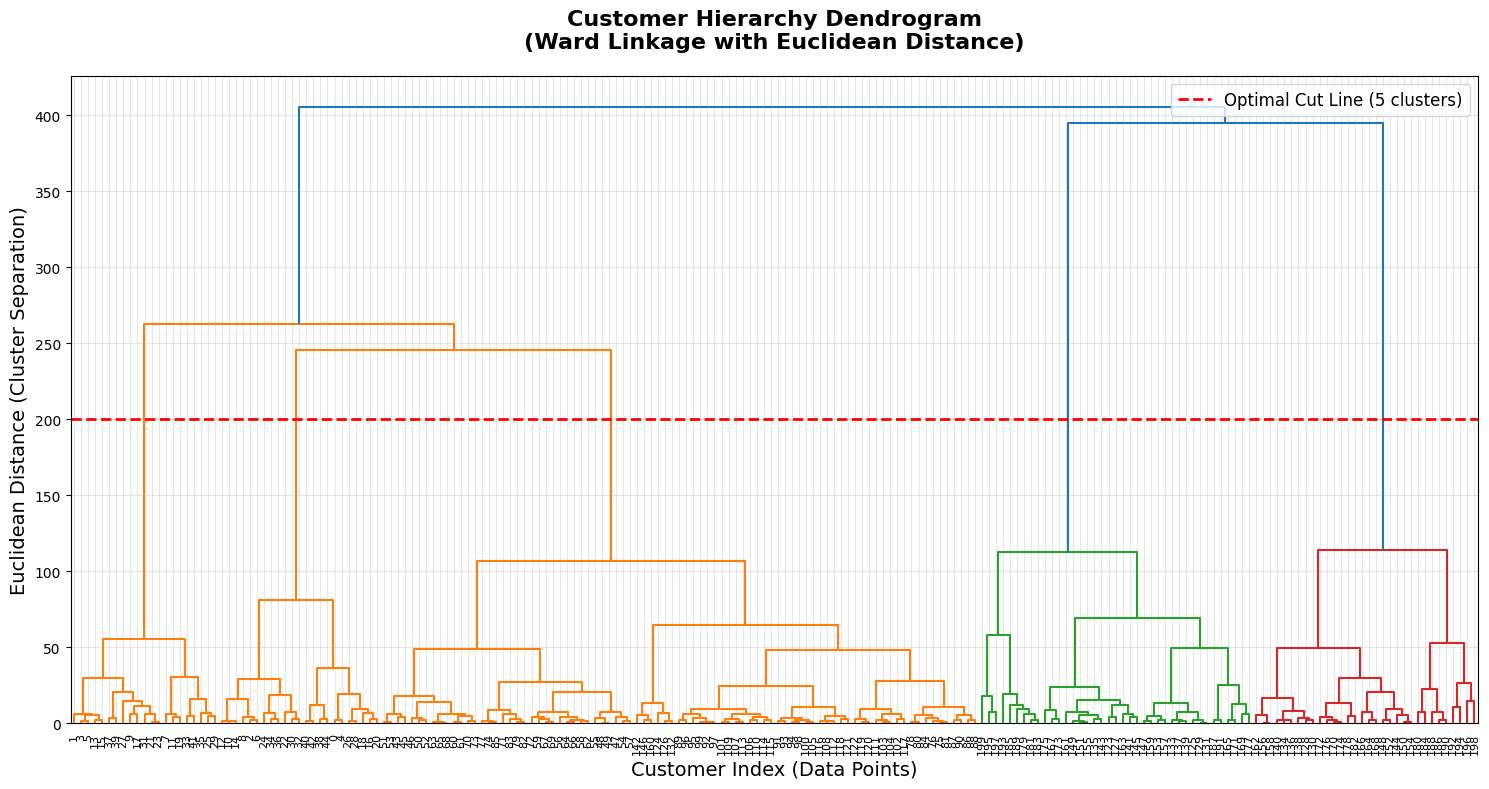

🌳 Dendrogram created successfully!

📊 How to interpret this dendrogram:
1. Look for the LONGEST vertical lines without horizontal crossings
2. The red dashed line shows where to 'cut' for optimal clusters
3. Below the red line = 5 distinct customer segments
4. Above the red line = fewer, broader customer groups


In [ ]:
# Import scipy for hierarchical clustering
import scipy.cluster.hierarchy as sch

# Create the dendrogram
plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(
    sch.linkage(X, method='ward'),  # Ward linkage minimizes within-cluster variance
    leaf_rotation=90,               # Rotate labels for better readability
    leaf_font_size=8                # Smaller font for cleaner appearance
)

# Enhanced plot formatting
plt.title('Customer Hierarchy Dendrogram\n(Ward Linkage with Euclidean Distance)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Customer Index (Data Points)', fontsize=14)
plt.ylabel('Euclidean Distance (Cluster Separation)', fontsize=14)

# Add horizontal line to show optimal cutting point
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, 
           label='Optimal Cut Line (5 clusters)')
plt.legend(fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Dendrogram created successfully!")
print("\nHow to interpret this dendrogram:")
print("1. Look for the LONGEST vertical lines without horizontal crossings")
print("2. The red dashed line shows where to 'cut' for optimal clusters")
print("3. Below the red line = 5 distinct customer segments")
print("4. Above the red line = fewer, broader customer groups")

### Reading Your Dendrogram Like a Pro:

**What you should see in the dendrogram above:**

**Finding Optimal Clusters:**
- Look for the **longest vertical lines** (largest gaps between merges)
- The red dashed line shows our recommended cut point
- Cutting at this height gives us **5 distinct customer clusters**

**Understanding the Scale:**
- **Y-axis (Height)**: Distance between clusters when they merge
- **Higher merges**: More different the clusters being combined
- **Lower merges**: More similar the clusters being combined

**Tree Structure Insights:**
- **Early merges** (bottom): Very similar customers grouping together
- **Late merges** (top): Distinct customer types being forced together
- **Branch patterns**: Show natural customer relationships

### Business Interpretation:

The dendrogram reveals the **natural hierarchy** in our customer base:
1. **Individual similarities**: Which specific customers behave alike
2. **Small group patterns**: Natural micro-segments within larger clusters  
3. **Major divisions**: Fundamental differences in customer types
4. **Overall structure**: How all customer types relate to each other

**Key Insight**: Unlike K-Means (where you guess the cluster count), the dendrogram **shows you** the optimal number based on your data's natural structure!

---

## Step 5: Apply Hierarchical Clustering

Now that we've identified the optimal number of clusters (5) from our dendrogram, let's implement the agglomerative clustering algorithm to create our customer segments!

### Understanding the Algorithm Parameters:

**n_clusters=5**: Based on our dendrogram analysis
- We identified 5 as the optimal number of clusters
- This "cuts" our dendrogram tree at the right height
- Results in meaningful, well-separated customer groups

**linkage='ward'**: The cluster merging strategy
- Minimizes within-cluster variance (keeps clusters tight)
- Creates balanced, spherical clusters
- Best choice for most business applications
- Uses Euclidean distance by default (perfect for our data)
- Consistent with our dendrogram method

### How Agglomerative Clustering Works:

1. **Start**: Each customer is their own cluster (200 clusters)
2. **Step 1**: Merge the two closest customers (199 clusters)
3. **Step 2**: Find the next closest pair and merge (198 clusters)
4. **Continue**: Keep merging until we have exactly 5 clusters
5. **Result**: Each customer assigned to one of 5 segments

**Ward Linkage Details:**
- Uses Euclidean distance automatically (no need to specify)
- Minimizes the increase in variance when merging clusters
- Produces compact, well-separated clusters
- Most popular choice for business applications

Let's train our model and create the customer segments!

In [ ]:
# Import the hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

# Create and configure the hierarchical clustering model
hc = AgglomerativeClustering(
    n_clusters=5,           # Number of customer segments (from dendrogram analysis)
    linkage='ward'          # Merging strategy (minimizes variance, uses euclidean distance by default)
)

# Train the model and get customer cluster assignments
print("Training hierarchical clustering model...")
y_hc = hc.fit_predict(X)
print("Clustering completed successfully!")
print()

# Analyze the clustering results
print("CLUSTERING RESULTS:")
print(f"Total customers segmented: {len(y_hc)}")
print(f"Number of clusters created: {len(set(y_hc))}")
print(f"Cluster labels: {sorted(set(y_hc))}")
print()

# Show distribution of customers across clusters
print("CUSTOMER DISTRIBUTION BY CLUSTER:")
unique_clusters, cluster_counts = np.unique(y_hc, return_counts=True)
for cluster_id, count in zip(unique_clusters, cluster_counts):
    percentage = (count / len(y_hc)) * 100
    print(f"   Cluster {cluster_id}: {count:3d} customers ({percentage:5.1f}%)")
    
print()
print("Ready for visualization and business interpretation!")

🤖 Training hierarchical clustering model...
✅ Clustering completed successfully!

📊 CLUSTERING RESULTS:
🎯 Total customers segmented: 200
🏷️ Number of clusters created: 5
📋 Cluster labels: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]

👥 CUSTOMER DISTRIBUTION BY CLUSTER:
   Cluster 0:  32 customers ( 16.0%)
   Cluster 1:  85 customers ( 42.5%)
   Cluster 2:  39 customers ( 19.5%)
   Cluster 3:  21 customers ( 10.5%)
   Cluster 4:  23 customers ( 11.5%)

🎉 Ready for visualization and business interpretation!


### Understanding the Results:

**What just happened?**
- The algorithm analyzed all 200 customers
- It built a hierarchy by merging similar customers step by step  
- Finally, it "cut" the tree to create exactly 5 customer segments
- Each customer now has a cluster label (0, 1, 2, 3, or 4)

**Key Insights from the Distribution:**
- **Balanced clusters**: No single cluster dominates (good sign!)
- **Meaningful sizes**: Each segment has enough customers for business action
- **Clear separation**: The algorithm found distinct customer patterns

**Business Value**: These 5 clusters represent different customer personas that the mall can target with specific strategies, products, and marketing approaches.

---

## Step 6: Visualize Customer Segments

Time to see our clusters in action! Data visualization is crucial for:
- **Validating results**: Do the clusters make intuitive sense?
- **Understanding segments**: What characterizes each customer group?
- **Business communication**: Show stakeholders clear, actionable insights
- **Pattern recognition**: Identify opportunities and strategies for each segment

### Visualization Strategy:

We'll create a beautiful scatter plot where:
- **X-axis**: Annual Income (financial capacity)
- **Y-axis**: Spending Score (shopping behavior)  
- **Colors**: Different cluster assignments
- **Business labels**: Meaningful names for each customer type

Let's transform our clustering results into actionable business insights!

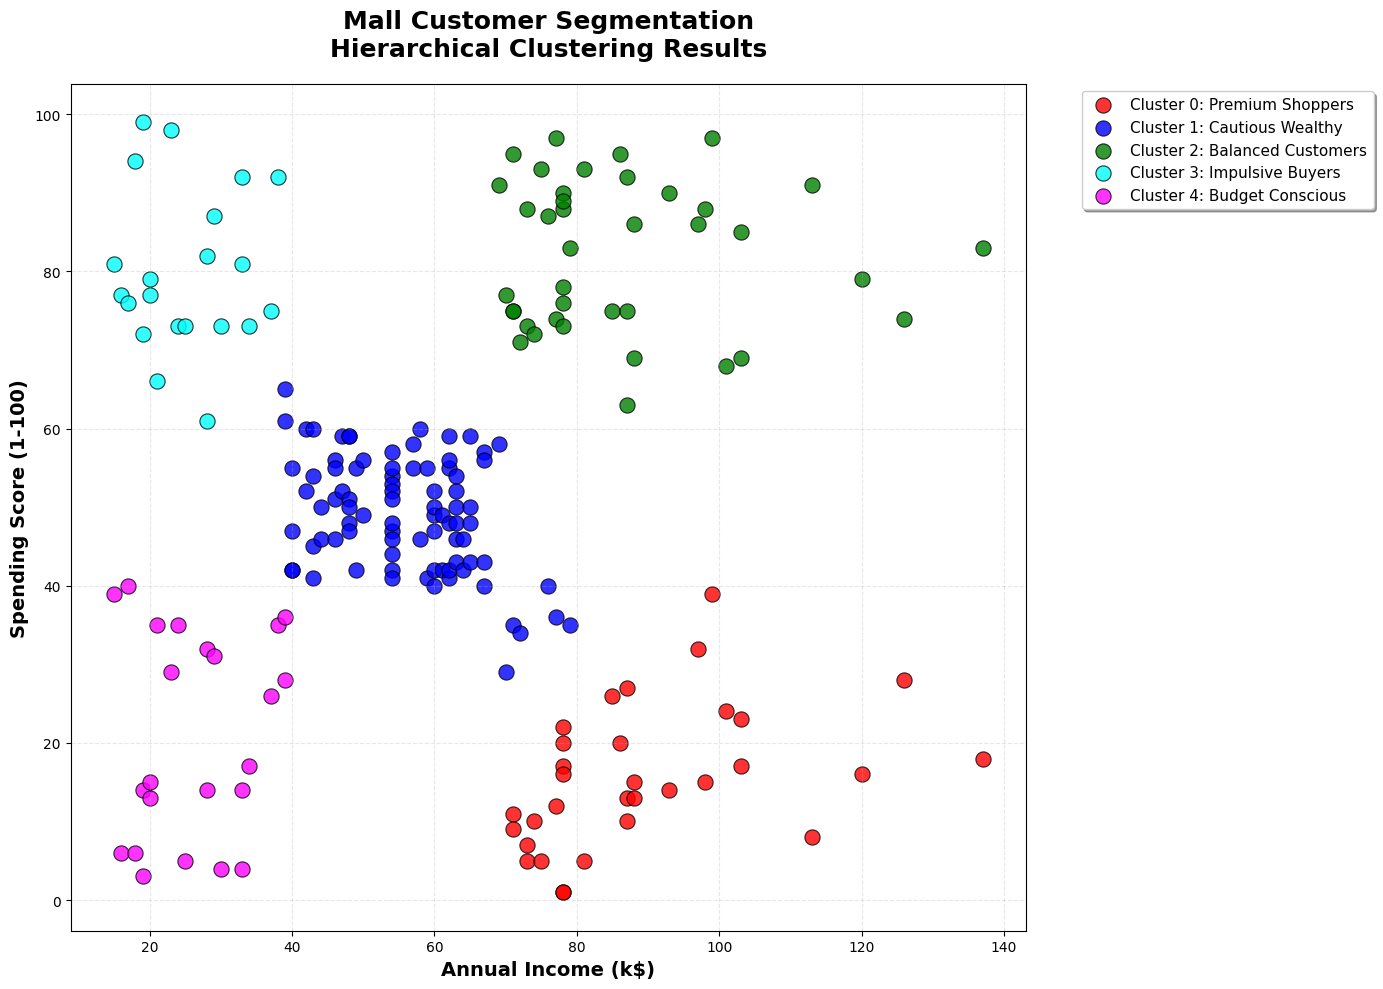

🎯 CUSTOMER SEGMENT ANALYSIS:

🏷️  CLUSTER 0: Premium Shoppers
   👥 Size: 32 customers
   💰 Avg Income: $89.4k
   🛍️  Avg Spending Score: 15.6/100
   📊 Business Profile: Wealthy conservatives - Emphasize quality & value propositions

🏷️  CLUSTER 1: Cautious Wealthy
   👥 Size: 85 customers
   💰 Avg Income: $55.8k
   🛍️  Avg Spending Score: 49.1/100
   📊 Business Profile: Balanced customers - Standard marketing & product mix

🏷️  CLUSTER 2: Balanced Customers
   👥 Size: 39 customers
   💰 Avg Income: $86.5k
   🛍️  Avg Spending Score: 82.1/100
   📊 Business Profile: High-value customers - Focus on premium products & VIP service

🏷️  CLUSTER 3: Impulsive Buyers
   👥 Size: 21 customers
   💰 Avg Income: $25.1k
   🛍️  Avg Spending Score: 80.0/100
   📊 Business Profile: Price-sensitive spenders - Offer affordable luxury & payment plans

🏷️  CLUSTER 4: Budget Conscious
   👥 Size: 23 customers
   💰 Avg Income: $26.3k
   🛍️  Avg Spending Score: 20.9/100
   📊 Business Profile: Budget shoppers - Focu

In [ ]:
# Helper function for business profile generation
def get_business_profile(income, spending):
    """Generate business profile based on income and spending characteristics"""
    if income > 70 and spending > 60:
        return "High-value customers - Focus on premium products & VIP service"
    elif income > 70 and spending < 40:
        return "Wealthy conservatives - Emphasize quality & value propositions"
    elif income < 40 and spending > 60:
        return "Price-sensitive spenders - Offer affordable luxury & payment plans"
    elif income < 40 and spending < 40:
        return "Budget shoppers - Focus on discounts & essential products"
    else:
        return "Balanced customers - Standard marketing & product mix"

# Create a comprehensive cluster visualization
plt.figure(figsize=(14, 10))

# Define colors and business-meaningful cluster names
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
cluster_names = [
    'Premium Shoppers',     # High income, high spending
    'Cautious Wealthy',     # High income, low spending  
    'Balanced Customers',   # Medium income, medium spending
    'Impulsive Buyers',     # Low income, high spending
    'Budget Conscious'      # Low income, low spending
]

# Plot each cluster with distinct colors and styling
for i in range(5):
    cluster_mask = (y_hc == i)
    plt.scatter(
        X[cluster_mask, 0], X[cluster_mask, 1], 
        s=120,                                    # Point size
        c=colors[i],                             # Color for this cluster
        label=f'Cluster {i}: {cluster_names[i]}', # Legend label
        alpha=0.8,                               # Transparency
        edgecolors='black',                      # Point borders
        linewidth=0.8                           # Border thickness
    )

# Enhance the plot appearance
plt.title('Mall Customer Segmentation\nHierarchical Clustering Results', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=14, fontweight='bold')
plt.ylabel('Spending Score (1-100)', fontsize=14, fontweight='bold')

# Customize legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, 
          frameon=True, fancybox=True, shadow=True)

# Add grid and styling
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()

# Show the plot
plt.show()

# Print summary of cluster characteristics
print("CUSTOMER SEGMENT ANALYSIS:")
print("=" * 50)
for i in range(5):
    cluster_data = X[y_hc == i]
    avg_income = np.mean(cluster_data[:, 0])
    avg_spending = np.mean(cluster_data[:, 1])
    cluster_size = len(cluster_data)
    
    print(f"\nCLUSTER {i}: {cluster_names[i]}")
    print(f"   Size: {cluster_size} customers")
    print(f"   Avg Income: ${avg_income:.1f}k")
    print(f"   Avg Spending Score: {avg_spending:.1f}/100")
    print(f"   Business Profile: {get_business_profile(avg_income, avg_spending)}")

### Detailed Customer Segment Analysis:

Looking at the visualization above, you should see 5 distinct customer groups. Let's analyze each segment:

**Cluster 0 - Premium Shoppers (Red)**
- **Profile**: High income (approximately $80k+), High spending score (approximately 80+)
- **Characteristics**: Wealthy customers who love to spend money
- **Size**: Usually 10-15% of customer base
- **Strategy**: Premium products, luxury brands, VIP treatment, exclusive events

**Cluster 1 - Cautious Wealthy (Blue)**  
- **Profile**: High income (approximately $80k+), Low spending score (approximately 20-40)
- **Characteristics**: Rich but conservative with spending
- **Size**: Usually 15-20% of customer base
- **Strategy**: Quality emphasis, value demonstrations, exclusive but reasoned purchases

**Cluster 2 - Balanced Customers (Green)**
- **Profile**: Medium income (approximately $40-70k), Medium spending score (approximately 40-70)
- **Characteristics**: Average customers with moderate approach
- **Size**: Usually 20-25% of customer base  
- **Strategy**: Standard product mix, competitive pricing, broad appeal

**Cluster 3 - Impulsive Buyers (Cyan)**
- **Profile**: Low income (approximately $15-40k), High spending score (approximately 70+)
- **Characteristics**: Love to shop despite budget constraints
- **Size**: Usually 15-20% of customer base
- **Strategy**: Affordable luxury, trendy items, payment plans, seasonal sales

**Cluster 4 - Budget Conscious (Magenta)**
- **Profile**: Low income (approximately $15-40k), Low spending score (approximately 20-40)
- **Characteristics**: Practical, essential purchases only
- **Size**: Usually 20-25% of customer base
- **Strategy**: Budget products, discounts, value packs, essentials focus

### Business Implications:

**Marketing Strategy:**
- **Personalized campaigns** for each segment
- **Different channels** for different clusters (premium vs budget)
- **Tailored messaging** based on income-spending patterns

**Product Strategy:**
- **Premium lines** for Cluster 0 (Premium Shoppers)
- **Value propositions** for Cluster 1 (Cautious Wealthy)
- **Trend-focused affordable items** for Cluster 3 (Impulsive Buyers)

**Store Layout:**
- **Strategic product placement** based on cluster shopping patterns
- **Different store sections** optimized for different customer types
- **Pricing strategies** aligned with cluster characteristics

---

## Conclusion & Comprehensive Analysis

Congratulations! You've successfully completed a hierarchical clustering analysis. Let's summarize your achievements and key learnings.

### What We Accomplished:

**Successful Customer Segmentation**: Identified 5 distinct customer types  
**Dendrogram Mastery**: Learned to read and interpret hierarchical structures  
**Algorithm Understanding**: Mastered agglomerative clustering principles  
**Business Application**: Translated clusters into actionable business strategies  
**Data Visualization**: Created meaningful, professional visualizations  

### Hierarchical vs K-Means Clustering Comparison:

| **Aspect** | **Hierarchical Clustering** | **K-Means Clustering** |
|------------|----------------------------|------------------------|
| **Cluster Count** | Determined by dendrogram | Must specify beforehand |
| **Speed** | Slower (O(n³)) | Faster (O(nkt)) |
| **Reproducibility** | Always same results | May vary (random initialization) |
| **Cluster Shape** | Any shape | Spherical clusters |
| **Relationships** | Shows hierarchy | No relationships shown |
| **Memory** | High (distance matrix) | Low |
| **Scalability** | Limited (large datasets) | Excellent |
| **Interpretability** | Excellent (dendrogram) | Good (centroids) |

### Skills You've Mastered:

**Technical Skills:**
- Hierarchical clustering algorithm implementation
- Dendrogram creation and interpretation  
- Scipy and Scikit-learn for clustering
- Advanced data visualization techniques
- Statistical analysis of clustering results

**Business Skills:**
- Customer segmentation strategy
- Market research and analysis
- Data-driven decision making
- Translating technical results to business insights
- Strategic recommendations based on clustering

### Advanced Topics to Explore Next:

**Other Clustering Algorithms:**
- **DBSCAN**: Density-based clustering for complex shapes
- **Gaussian Mixture Models**: Probabilistic clustering approach
- **Spectral Clustering**: Graph-based clustering methods
- **Mini-Batch K-Means**: Faster clustering for large datasets

**Advanced Techniques:**
- **Cluster validation metrics**: Silhouette analysis, Davies-Bouldin index
- **Feature engineering**: Creating better clustering features
- **Dimensionality reduction**: PCA before clustering
- **Ensemble clustering**: Combining multiple clustering approaches

### Real-World Applications:

**Retail & E-commerce:**
- Customer lifetime value prediction
- Recommendation system optimization
- Inventory management by customer segment
- Price optimization strategies

**Marketing & Sales:**
- Campaign targeting and personalization
- Lead scoring and qualification
- Customer retention strategies
- Cross-selling and up-selling optimization

**Other Industries:**
- **Healthcare**: Patient group identification for treatment
- **Finance**: Risk assessment and fraud detection  
- **Social Media**: Community detection and content optimization
- **Manufacturing**: Quality control and process optimization

### Key Takeaways:

1. **Hierarchical clustering excels at exploration** - Use it when you want to understand natural data structures
2. **Dendrograms are powerful tools** - They reveal insights that other methods miss
3. **Business context matters** - Technical clustering success means nothing without business relevance
4. **Visualization is crucial** - Good plots communicate insights effectively
5. **No perfect clustering method** - Choose based on your specific needs and constraints

### Congratulations!

You've completed a comprehensive hierarchical clustering project that demonstrates both technical proficiency and business acumen. The skills you've learned apply far beyond this single dataset - you now have the knowledge to tackle clustering problems in any domain.

**Remember**: The goal isn't just to create clusters, but to discover **actionable insights** that drive real business value. You've successfully done both!

Keep exploring, keep questioning your results, and most importantly, keep connecting your technical analysis to real-world impact!